In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [248]:
iris = load_iris()
x = iris.data
y = iris.target

# 線形回帰

もともと$y$を近似する関数$f(\vec{x}) = \vec{w}^T \phi(\vec{x})$のパラメータ$\vec{w}$を求めることが目標であった。そして二乗和誤差を$|| y_i - f(\vec{x_i}) ||^2$としてとるが、これを各$i$に対してまとめて求めるため、結局下のような式になる。
\begin{eqnarray*}
\vec{w} = ( \Phi^T \Phi)^{-1} \Phi^T) \vec{y}
\end{eqnarray*}

$A \vec{x} = \vec{b}$を解くことを考える。ここでは二乗和誤差が最小となる解を求める、すなわち
\begin{eqnarray*}
\vec{x}^{\ast} = argmin_{\vec{x}} L(\vec{x}) \equiv argmin_{\vec{x}} || A \vec{x} - \vec{b} ||^2
\end{eqnarray*}
を満たすような$\vec{x}^{\ast}$を求める。  
$A$が正則ならば明らかに$\vec{x}^{\ast} = A^{-1} \vec{b}$であり、そのときの誤差は0になる。$A$が正則でないときには、
\begin{eqnarray*}
L(\vec{x}) &=& || A \vec{x} - \vec{b} ||^2 \\
&=& (A \vec{x} - \vec{b})^T (A \vec{x} - \vec{b}) \\
&=& \vec{x}^T A^T A \vec{x} - \vec{x}^T A^T \vec{b} - \vec{b}^T A \vec{x} + \vec{b}^T \vec{b}
\end{eqnarray*}
とし、これを$\vec{x}$で微分した
\begin{eqnarray*}
\frac{\partial}{\partial \vec{x}} L(\vec{x})
&=& (A^T A + (A^T A)^T) \vec{x} - A^T \vec{b} - A^T \vec{b} \\
&=& 2 A^T A \vec{x} - 2 A^T \vec{b}
\end{eqnarray*}
が0になるような$\vec{x}$を考える。すなわち
\begin{eqnarray*}
A^T A \vec{x} = A^T \vec{b}
\end{eqnarray*}
を満たすような$\vec{x}$をとれば良い。  
これを$\vec{x}$について解くために、擬似逆行列$A^{\dagger}$を導入する。以下の4条件
\begin{eqnarray}
A A^{\dagger} A &=& A \\
A^{\dagger} A A^{\dagger} &=& A^{\dagger} \\
(A^{\dagger} A)^T &=& A^{\dagger} A \\
(A A^{\dagger})^T &=& A A^{\dagger}
\end{eqnarray}
を満たす$A^{\dagger}$を$A$の擬似逆行列と言う。
$A \in M_{mn}$について$rank(A) = m$ならば$A A^T$は正則であって$A^{\dagger} = A^T (A A^T)^{-1}$が成立する。
また、$rank(A) = n$ならば$A^T A$は正則であって$A^{\dagger} \equiv (A^T A)^{-1} A^T$が成立する。  
最小二乗解を(解析的に)求めるには$rank(A) = n$が必要であるが、もしこれを仮定できれば
\begin{eqnarray*}
\vec{x}^{\ast} = A^{\dagger} \vec{b}
\end{eqnarray*}
が成立する。


# 正則化線形回帰

線形回帰の問題において解$\vec{x}^{\ast}$が大きくなりすぎないように正則化項を加えることを考える。すなわち
\begin{eqnarray*}
\vec{x}^{\ast} = argmin_{\vec{x}} L(\vec{x}) \equiv argmin_{\vec{x}} (|| A \vec{x} - \vec{b} ||^2 + \lambda || \vec{x} || ^2)
\end{eqnarray*}
という問題を考える。正則化項がない場合の線形回帰問題と同様に$L(\vec{x})$の微分をとって
\begin{eqnarray*}
\frac{\partial}{\partial \vec{x}} L(\vec{x})
= 2 A^T A \vec{x} - 2 A^T \vec{b} + 2 \lambda \vec{x}
\end{eqnarray*}
が得られる。これを0とおくと
\begin{eqnarray*}
(A^T A + \lambda I) \vec{x} = A^T \vec{b}
\end{eqnarray*}
となる。この後も同様にして解くことができる。

In [3]:
def sign(x):
    return np.where(x>=0, 1, -1)    

def step_function(x):
    return np.where(x>=0, 1, 0)
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Base():
    def __init__(self, *func):
        self.func = list(func)
        self.n = len(self.func)
    def apply(self, x):
        y = self.func[0](x).reshape(-1,1)
        for k in range(1,self.n):
            y = np.concatenate((y, self.func[k](x).reshape(-1,1)), axis=1)
        return y

In [135]:
class LinearRegression():
    def __init__(self, base, input_dim=1, output_dim=1, lam=0.0):
        self.weight = np.zeros((output_dim,))
        self.base = base
        self.lam = lam
        self.input_dim = input_dim
        self.output_dim = output_dim
    def fit(self, x, y):
        phi = self.base.apply(x)
        w_dagger = np.linalg.inv(np.dot(phi.T, phi) + self.lam * np.eye(phi.shape[1])).dot(phi.T)
        self.weight = w_dagger.dot(y)
        return self.weight
    def predict(self, x):
        phi = self.base.apply(x)
        f = np.dot(phi, self.weight)
        return f

In [136]:
x = np.array([1,2,3,4]).reshape(-1, 1)
y = np.array([2,4,6,7])
base = Base(lambda x: x, lambda x: x*x)
base.apply(x)

array([[ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16]])

In [138]:
lr = LinearRegression(base, output_dim=2)
lr.fit(x,y)
lr.predict(x)

array([2.16774194, 4.07741935, 5.72903226, 7.12258065])

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
lr.predict(x)

array([2.2, 3.9, 5.6, 7.3])

# パーセプトロン

2値分類について考える。各データをクラス$\pm 1$のいずれかに分類することを考え、
\begin{eqnarray*}
y_i = f(\vec{w}^T \phi(\vec{x_i}))
\end{eqnarray*}
によってクラスを予測する。ここで$f$は活性化関数であるが、これは引数の値が非負ならば$+1$に割り当て、負ならば$-1$に割り当てる。  
誤差は(正解ラベルを$t_i$として)
\begin{eqnarray*}
L \equiv \Sigma_i - \vec{w}^T \phi(\vec{x_i}) t_i
\end{eqnarray*}
と定義する。ただし、和は誤分類したデータすべてについてとる。決定境界が$\vec{w}^T \phi(\vec{x_i}) = 0$にあることを考えると、境界面から離れるに従って誤差が大きくなっていくことがわかる。  この誤差関数に従って、パラメータ$\vec{w}$を
\begin{eqnarray*}
\vec{w}_{k+1} = \vec{w}_k + \eta \phi(\vec{x_i}) t_i
\end{eqnarray*}
によって更新する。ここで、スケーリングに対して予測結果は不変であることから、$\eta$を1として良い。すなわち
\begin{eqnarray*}
\vec{w}_{k+1} = \vec{w}_k + \phi(\vec{x_i}) t_i
\end{eqnarray*}
とすれば良い。
パーセプトロンの収束定理より有限回の繰り返しで厳密解に収束する。

In [178]:
class Perceptron():
    def __init__(self, base, input_dim=1, output_dim=1):
        self.weight = np.zeros((output_dim,))
        self.base = base
        self.input_dim = input_dim
        self.output_dim = output_dim
    def predict(self, x):
        phi = self.base.apply(x)
        linear_combination = np.dot(phi, self.weight)
        return sign(linear_combination)
    def fit(self, x, y, iteration=10):
        phi = self.base.apply(x)
        for _ in range(iteration):
            y_pred = self.predict(x)
            false = (y != y_pred)
            x_false = x[false]
            y_false = y[false]
            phi_false = phi[false]
            self.weight = self.weight + np.dot(y_false, phi_false)
        return self.weight

In [179]:
x = np.array([[1,2],[2,1],[-1,0],[-5,-1]])
y = np.array([1,1,-1,-1])
base = Base(lambda x: np.ones_like(x[:, 0]), lambda x: x[:, 0], lambda x: x[:, 1]*x[:, 1])
base.apply(x)

array([[ 1,  1,  4],
       [ 1,  2,  1],
       [ 1, -1,  0],
       [ 1, -5,  1]])

In [180]:
p = Perceptron(base, input_dim=3, output_dim=3)
p.fit(x,y)
p.predict(x)

[[ 1  2]
 [ 2  1]
 [-1  0]
 [-5 -1]]


array([ 1,  1, -1, -1])

# ロジスティック回帰

2値分類問題を生成的なアプローチで考える。生成的なアプローチでは、分布の形を仮定して、そのパラメータを最尤法で決定する。ここではガウス分布
\begin{eqnarray*}
p(\vec{x}) = \frac{1}{(2 \pi)^{\frac{D}{2}} |\Sigma|^{\frac{1}{2}}} \exp \left( - \frac{1}{2} (\vec{x} - \vec{\mu})^T \Sigma^{-1} (\vec{x} - \vec{\mu}) \right)
\end{eqnarray*}
をとることにする。クラスを$C_1, C_2$とし、データ点$\vec{x}$のクラス$C_1$に対する事後確率はベイズの定理より
\begin{eqnarray*}
p(C_1 | \vec{x})
&=& \frac{p(\vec{x} | C_1) p(C_1)}{p(\vec{x} | C_1) p(C_1) + p(\vec{x} | C_2) p(C_2)} \\
&=& \frac{1}{1 + \frac{p(\vec{x} | C_2) p(C_2)}{p(\vec{x} | C_1) p(C_1)}} \\
&=& \frac{1}{1 + \exp \left( \log \frac{p(\vec{x} | C_2) p(C_2)}{p(\vec{x} | C_1) p(C_1)} \right) } \\
\end{eqnarray*}
となる。シグモイド関数$\sigma(a) \equiv \frac{1}{1 + \exp(-a)}$を使えば
\begin{eqnarray*}
p(C_1 | \vec{x}) = \sigma \left( \log \frac{p(\vec{x} | C_1) p(C_1)}{p(\vec{x} | C_2) p(C_2)} \right)
\end{eqnarray*}
となる。ここで、クラスの条件付き分布の共分散行列が同じであるという仮定をおくと、$\log \frac{p(\vec{x} | C_1) p(C_1)}{p(\vec{x} | C_2) p(C_2)}$は$\vec{x}$に関して線形となる。よって
\begin{eqnarray*}
p(C_1 | \vec{x}) = \sigma (\vec{w}^T \vec{x})
\end{eqnarray*}
のように書くことができる。  
誤差関数は負の対数尤度とし、これを最小化することを考える。尤度は$y_i = p(C_1 | \vec{x_i}) = \sigma (\vec{w}^T \vec{x_i})$として
\begin{eqnarray*}
L \equiv p(\vec{t} | \vec{w}) = \Pi_i y_i^{t_i} (1 - y_i)^{1 - t_i}
\end{eqnarray*}
であるから、負の対数尤度は
\begin{eqnarray*}
E(\vec{w}) = - \log L(\vec{w}) = - \Sigma_i ( t_i \log(y_i) + (1 - t_i) \log(1 - y_i) )
\end{eqnarray*}
とかける。$\vec{w}$で微分すれば
\begin{eqnarray*}
\nabla E = \Sigma_i (y_i - t_i) \phi(\vec{x_i})
\end{eqnarray*}
が得られる。(計算過程はまた今度書く。)これに基づいて勾配法を適用する。

正則化項を含めると、損失関数は
\begin{eqnarray*}
E(\vec{w}) = - \Sigma_i ( t_i \log(y_i) + (1 - t_i) \log(1 - y_i) ) + \frac{1}{2} \lambda || w ||^2
\end{eqnarray*}
となる。よって
\begin{eqnarray*}
\nabla E = \Sigma_i (y_i - t_i) \phi(\vec{x_i}) + \lambda w
\end{eqnarray*}
となる。

In [111]:
class LogisticRegression():
    def __init__(self, base, input_dim=1, output_dim=1, lam=0.0, random_state=0):
#         self.weight = np.random.randn(output_dim)
        self.weight = np.zeros((output_dim,))
        self.base = base
        self.lam = lam
        self.input_dim = input_dim
        self.output_dim = output_dim
    def predict(self, x):
        phi = self.base.apply(x)
        linear_combination = np.dot(phi, self.weight)
        return sigmoid(linear_combination)
    def fit(self, x, y, iteration=10, learning_rate=0.001, threshold=0.001):
        phi = self.base.apply(x)
        for _ in range(iteration):
            y_pred = self.predict(x)
            res = y_pred - y
            if (np.all(np.abs(res) < threshold)):
                break
            self.weight = self.weight - learning_rate * (np.dot(y_pred - y, phi) - self.lam * self.weight)
        return self.weight

In [114]:
# TODO: スケールが大きいと更新が早い(どうやって実装する？)
_x = x[:100]
_y = y[:100]
base = Base(lambda x: np.ones_like(x[:, 0]), lambda x: x[:, 0], lambda x: x[:, 1], lambda x: x[:, 2], lambda x: x[:, 3])
lr = LogisticRegression(base, input_dim=4, output_dim=5)
lr.fit(_x, _y,iteration=100,learning_rate=0.001)
lr.predict(_x)

array([0.05188025, 0.08912967, 0.06669013, 0.10111529, 0.04822055,
       0.05778963, 0.06967287, 0.06836266, 0.11114234, 0.08805511,
       0.04567992, 0.08350144, 0.08588767, 0.06262912, 0.01893462,
       0.02362814, 0.03128403, 0.05536201, 0.05524711, 0.04780443,
       0.08290521, 0.05636013, 0.02897625, 0.11831485, 0.12846346,
       0.11592324, 0.08993026, 0.05878908, 0.05580142, 0.10362345,
       0.11099758, 0.06998198, 0.03011787, 0.02291222, 0.09372463,
       0.05299383, 0.04000122, 0.04639079, 0.08750222, 0.06659893,
       0.04883503, 0.17240587, 0.07211862, 0.09260347, 0.09266061,
       0.09729535, 0.05215725, 0.07941737, 0.0469175 , 0.06492203,
       0.95223557, 0.94827096, 0.97111023, 0.95957833, 0.96956023,
       0.96731788, 0.96161591, 0.87009952, 0.96048504, 0.93930904,
       0.93179988, 0.94146187, 0.94912223, 0.97234496, 0.8661622 ,
       0.93706037, 0.96587248, 0.93197031, 0.98227735, 0.93285518,
       0.97670067, 0.92228279, 0.98678814, 0.97146485, 0.94079

In [107]:
# 比較実験
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(_x,_y)
lr.predict_proba(_x)

/Users/Noahz-ark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.9837306 , 0.0162694 ],
       [0.96407227, 0.03592773],
       [0.97647105, 0.02352895],
       [0.95654126, 0.04345874],
       [0.98534488, 0.01465512],
       [0.98086592, 0.01913408],
       [0.97477662, 0.02522338],
       [0.9756756 , 0.0243244 ],
       [0.94988578, 0.05011422],
       [0.96484713, 0.03515287],
       [0.98650419, 0.01349581],
       [0.96730747, 0.03269253],
       [0.9660858 , 0.0339142 ],
       [0.97853302, 0.02146698],
       [0.9961785 , 0.0038215 ],
       [0.99471294, 0.00528706],
       [0.9920933 , 0.0079067 ],
       [0.98205008, 0.01794992],
       [0.98221287, 0.01778713],
       [0.9854774 , 0.0145226 ],
       [0.96786256, 0.03213744],
       [0.98149485, 0.01850515],
       [0.99291282, 0.00708718],
       [0.94469065, 0.05530935],
       [0.93796494, 0.06203506],
       [0.94696615, 0.05303385],
       [0.96330912, 0.03669088],
       [0.98051681, 0.01948319],
       [0.98194177, 0.01805823],
       [0.95497024, 0.04502976],
       [0.

# サポートベクターマシン

2値分類問題を考える。具体的には、
\begin{eqnarray*}
y(x) = w^T \phi(x) + b
\end{eqnarray*}
の正負によってクラスを分類する。ここで分類境界は
\begin{eqnarray*}
y(x) = w^T x + b = 0
\end{eqnarray*}
を満たす超平面である。データ集合$\{ (x_n,t_n) \}_n$が線形分離できているとすると、各データ点から分類境界までの距離(マージン)は
\begin{eqnarray*}
\frac{|y(x)|}{||w||} = \frac{t_n y_n}{||w||} = \frac{t_n w^T \phi(x_n)}{||w||}
\end{eqnarray*}
とかける。ここで正しく分類できているデータ点に関して$t_n y_n > 0$が成り立つことを利用している。
分類境界に最も近いデータ点を$(x,t)$とする。スケーリングしても予測が不変であるから、適当にスケーリングすることで
\begin{eqnarray*}
t (w^T \phi(x) + b) = 1
\end{eqnarray*}
となるようにできる。それ以外の点については
\begin{eqnarray*}
t_n (w^T \phi(x_n) + b) \ge 1
\end{eqnarray*}
が成り立つ。この条件のもとでマージンを最大化したい。すなわち
\begin{eqnarray*}
argmax_{w,b} \frac{1}{||w||} s.t. t_n (w^T \phi(x_n) + b) \ge 1
\end{eqnarray*}
なる最適化問題を解きたい。これは
\begin{eqnarray*}
argmin_{w,b} \frac{1}{2}||w||^2 s.t. t_n (w^T \phi(x_n) + b) \ge 1
\end{eqnarray*}
を解くことと同値である。ここで最小化したい値$\frac{1}{2}||w||^2$のことをハードマージンという。

さて、線形分離不能なデータ集合に対しては、ペナルティを導入し、ソフトマージンを最小化することを考える。
\begin{eqnarray*}
argmin_{w,b,\xi} \frac{1}{2} ||w||^2 + C \Sigma_n \xi_n
s.t. t_n y(x_n) \ge 1 - \xi_n, \xi \ge 0
\end{eqnarray*}
ここで$\xi$はスラック変数であり、正しく分類されているデータ$(x_n, t_n)$に対しては$\xi_n = 0$となり、マージン内部にある、または誤分類しているときに限り正の値をとる。$C$は正則化パラメータである。
目的関数を条件を利用して書き直せば
\begin{eqnarray*}
argmin_{w,b,\xi} \frac{1}{2} ||w||^2 + C \Sigma_n \max(0, 1 - t_n y(x_n))
\end{eqnarray*}
とできる。これは制約なし最適化問題になっている。$\max(f(x), 0)$関数については$x=0$において微分が定義されないが、劣微分を用いることで解決できる。具体的には
\begin{eqnarray*}
\frac{\partial}{\partial x} \max(f(x), 0) = 
\begin{cases}
0 & \text{if } x \le 0\\
\frac{\partial}{\partial x} f(x) & \text{otherwise}
\end{cases}
\end{eqnarray*}
である。
(ロジスティック回帰との関係はまた今度書く)

\begin{eqnarray*}
y(x) &=& w^T \phi(x) + b \\
\frac{\partial}{\partial w} \frac{1}{2} w^T w &=& w \\
\frac{\partial}{\partial w} y(x) &=& \phi(x) \\
\frac{\partial}{\partial w} \max(0, 1 - t_n y_n) &=& 
\begin{cases}
0 & \text{if } x \le 0 \\
- t_n \phi(x_n) & \text{otherwise} \\
\end{cases} \\
\frac{\partial}{\partial w} \frac{1}{2} ||w||^2 + C \Sigma_n \max(0, 1 - t_n y(x_n)) &=& w - C \Sigma_n t_n \phi(x_n) \\
\frac{\partial}{\partial b} \frac{1}{2} ||w||^2 + C \Sigma_n \max(0, 1 - t_n y(x_n)) &=& - C \Sigma_n t_n
\end{eqnarray*}
となる。ただし、和は$1 - t_n y(x_n) > 0$なるデータについてとる。

In [83]:
class SupportVectorMachine():
    def __init__(self, base, input_dim, output_dim, C=1.0):
        self.weight = np.zeros((output_dim),)
        self.bias = 0.0
        self.base = base
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.C = C
    def predict(self, x):
        phi = self.base.apply(x)
        linear_combination = np.dot(phi, self.weight) + self.bias
        return sign(linear_combination)
    def fit(self, x, y, iteration=10, learning_rate=0.001):
        phi = self.base.apply(x)
        for _ in range(iteration):
            y_pred = self.predict(x)
            false = (y * y_pred) < 1
            if (not np.any(false)):
                break
            x_false = x[false]
            y_false = y[false]
            phi_false = phi[false]
            self.weight = self.weight - learning_rate * (self.weight - self.C * np.dot(y_false, phi_false))
            self.bias = self.bias + learning_rate * (self.C * np.sum(y_false))
        return self.weight, self.bias

In [100]:
_x = x[:100]
_y = np.where(y[:100] > 0, y[:100], -1)
base = Base(lambda x: np.ones_like(x[:, 0]), lambda x: x[:, 0], lambda x: x[:, 1], lambda x: x[:, 2], lambda x: x[:, 3])
svm = SupportVectorMachine(base, input_dim=4, output_dim=5)
svm.fit(_x, _y,iteration=10,learning_rate=0.001)
svm.predict(_x)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

# K近傍法

学習用データが与えられた際、それらをすべて記憶しておく。テストデータが来た際に、その点から(ある距離指標に関して)最も近い$k$点を選び、それらのクラスラベルの多数決によってテストデータのクラスラベルを決定する。

In [300]:
class KNearestNeighbor():
    def __init__(self, k):
        self.k = k
        self.x = np.array([])
        self.y = np.array([], dtype=np.int64)
        self.classes = np.unique(y)
    def fit(self, x, y):
        self.x = self.x.reshape(-1, x.shape[1])
        self.x = np.concatenate([self.x, x], axis=0)
        self.y = np.concatenate([self.y, y])
    def predict(self, x):
        distance = np.array([np.linalg.norm(self.x - _x, axis=1) for _x in x])
        index = np.argsort(distance, axis=1)
        k_nearest = np.array([np.argmax(np.bincount(self.y[_index < self.k])) for _index in index])
        return k_nearest

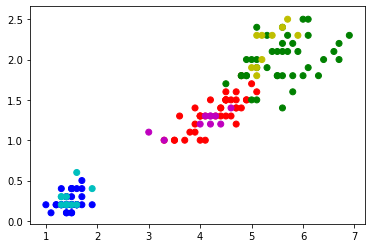

In [308]:
color = np.repeat("", 120)
color[y_train == 0] = "b"
color[y_train == 1] = "r"
color[y_train == 2] = "g"
plt.scatter(x_train[:, 0], x_train[:, 1], color=color)
color = np.repeat("", 30)
color[y_test == 0] = "c"
color[y_test == 1] = "m"
color[y_test == 2] = "y"
plt.scatter(x_test[:, 0], x_test[:, 1], color=color)

plt.show()

In [303]:
_x = x[:, [2,3]]
_y = y
test_index = set(np.arange(40,50)) | set(np.arange(90,100)) | set(np.arange(140,150))
train_index = set(np.arange(0,150)) - test_index
test_index = np.array(list(test_index))
train_index = np.array(list(train_index))
x_train = _x[train_index]
y_train = _y[train_index]
x_test = _x[test_index]
y_test = _y[test_index]
print(y_train)
print(y_test)
knn = KNearestNeighbor(k=5)
knn.fit(x_train,y_train)
knn.predict(x_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

# 決定木

ノンパラメトリック手法の1つで、入力空間を分割することでクラスを分類する。(回帰ならばそのクラスに定数値を割り当てる。)分割の仕方は、IG(Information Gain)がより大きくなるように行う。ここで、
\begin{eqnarray*}
IG = I_{parent} - \Sigma_{child} \frac{N_{child}}{N_{parent}} I_{child}
\end{eqnarray*}
とする。IはImpurity(不純度)で、その指標として次の3つが提唱されている。
- エントロピー
$I_H = - \Sigma_c p(c|t) \log{p(c|t)}$
- ジニ係数
$I_G = \Sigma_c p(c|t) (1 - p(c|t)) = 1 - \Sigma_c p(c|t)^2$
- 誤差分類率
$I_E = 1 - max_c p(c|t)$  
最初の木は1つのノードからなる(つまりすべてのデータ点が同じクラスに分類される)として、木を成長させていく。ノードを増やしていくことで分類境界が複雑になり、より表現力が上がる。最小化したい誤差関数を
\begin{eqnarray*}
E = \Sigma I + c | T |
\end{eqnarray*}
とおく。ここで$|T|$は木のノード数であり、$\Sigma$は木のノード全体に対して和をとる。$|T|$は正則化項に対応している。

In [69]:
def entropy(c):
    _, counts = np.unique(c, return_counts=True)
    total_counts = np.sum(counts)
    ps = counts / total_counts
    IH = np.sum(- ps * np.log(ps))
    return IH

def gini(c):
    _, counts = np.unique(c, return_counts=True)
    total_counts = np.sum(counts)
    ps = counts / total_counts
    IG = 1 - np.sum(ps**2)
    return IG

def error_rate(c):
    _, counts = np.unique(c, return_counts=True)
    total_counts = np.sum(counts)
    ps = counts / total_counts
    IE = 1 - np.max(ps)
    return IE

class DecisionTree():
    def __init__(self, x=np.array([]), y=np.array([]), impurity=entropy):
        self.x = x
        self.y = y
        self.label = np.argmax(np.bincount(y)) if (y.size > 0) else None
        self.impurity = impurity
        self.condition = None
        self.left = None
        self.right = None
    def search(self, x):
        if (self.condition):
            truth_value = self.condition(x)
            if (truth_value):
                return self.left.search(x)
            else:
                return self.right.search(x)
        else:
            return self.label
    def expand(self, condition):
        self.condition = condition
        truth_values = np.array([self.condition(_x) for _x in self.x])
        left = DecisionTree(x=self.x[truth_values == True], y=self.y[truth_values == True], impurity=self.impurity)
        right = DecisionTree(x=self.x[truth_values == False], y=self.y[truth_values == False], impurity=self.impurity)
        self.left = left
        self.right = right
    def cut(self):
        self.condition = None
        self.left = None
        self.right = None
    def information_gain(self):
        I_parent = self.impurity(self.y)
        if (self.left or self.right):
            I_left = self.impurity(self.left.y)
            I_right = self.impurity(self.right.y)
            n_parent = len(self.y)
            n_left = len(self.left.y)
            n_right = len(self.right.y)
            IG = I_parent - I_left*n_left/n_parent - I_right*n_right/n_parent
        else:
            IG = 0
        return IG

In [74]:
class DecisionTreeClassifier(DecisionTree):
    def __init__(self):
        pass
    def fit(self, x, y):
        super().__init__(x, y)
    def predict(self, x):
        labels = np.array([self.search(_x) for _x in x])
        return labels

In [75]:
tree = DecisionTreeClassifier()
tree.fit(x, y)
tree.expand(lambda x: x[0] > 5.0)
tree.left.expand(lambda x: x[1] < 3.0)
tree.predict(x)

array([2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2])

# KMeans

EMアルゴリズムを利用したアルゴリズムの1つである。データセットをいくつかのクラスタに分割することを目標とする。
アルゴリズムでは、
- E step  
各データ点について、最も近いクラスタ中心のクラスタを割り当てる。
- M step  
各クラスタについて、それに属しているデータ点すべての平均をとり、新しいクラスタ中心とする。 
の2ステップを反復実行して解を求める。

初期値をランダムに決めると収束が遅いことがある。これを改善するためにK-means++という手法がある。K-means++では以下のようにしてクラスタ中心を決定する。
> 1. データ点をランダムに1つ選ぶ。
> 2. クラスタ中心がk個選ばれるまで以下を繰り返す。
>> 各データ点$\vec{x}$について最も近いクラスタ中心までの距離を$D(\vec{x})$とする。このとき
\begin{eqnarray*}
p(\vec{x}) = \frac{D(\vec{x})^2}{\Sigma D(\vec{x})^2}
\end{eqnarray*}
>> という確率分布に従って次のクラスタ中心を(データ点の中から)選ぶ。

# 混合ガウスモデル

$$
p({\bf x}) \equiv \sum_{k=1}^K \pi_k N({\bf x} | {\bf \mu_k}, \Sigma_k)
$$

潜在変数${\bf z}$
$$
p(z_k = 1) = \pi_k \\
\sum_{k=1}^K z_k = 1 \\
\sum_{k=1}^K \pi_k = 1
$$

$$
p({\bf z}) = \prod_{k=1}^K \pi_k^{z_k} \\
p({\bf x} | z_k = 1) = \mathcal{N} ({\bf x} | \mu_k, \Sigma_k) \\
p({\bf x} | {\bf z}) = \prod_{k=1}^K \mathcal{N} ({\bf x} | \mu_k, \Sigma_k)^{z_k} \\
p({\bf x}) = \sum_{\bf z} p({\bf x} | {\bf z}) p({\bf z}) = \sum_{k=1}^K \pi_k \mathcal{N}({\bf x} | {\bf \mu_k}, \Sigma_k) \\
\gamma(z_k) \equiv p(z_k=1 | {\bf x}) = \frac{p(z_k=1)p({\bf x} | z_k=1)}{\sum_{j=1}^K p(z_j=1)p({\bf x} | z_j=1)}
$$

$$
p({\bf x_n}) = \sum_{k=1}^K \pi_k \mathcal{N}({\bf x_n} | {\bf \mu_k}, \Sigma_k) \\
\log p(X) = \sum_{n=1}^N \log p({\bf x_n}) \\
L = - \log p(X) + \sum_{k=1}^K \pi_k \\
\frac{\partial}{\partial \pi_k} L = 1 - \sum_{n=1}^N \mathcal{N}({\bf x_n} | {\bf \mu_k}, \Sigma_k) \\
\frac{\partial}{\partial \mu_k} L = \sum_{n=1}^N \frac{\pi_k \mathcal{N}({\bf x_n} | {\bf \mu_k}, \Sigma_k)}{\sum_{k=1}^K \mathcal{N}({\bf x_n} | {\bf \mu_k}, \Sigma_k)} \Sigma_k^{-1} ({\bf x_n} - {\bf \mu_k}) = \sum_{n=1}^N \gamma_{nk} \Sigma_k^{-1} ({\bf x_n} - {\bf \mu_k}) \\
\frac{\partial}{\partial \Sigma_k} L = \sum_{n=1}^N \frac{\pi_k \mathcal{N}({\bf x_n} | {\bf \mu_k}, \Sigma_k)}{\sum_{k=1}^K \mathcal{N}({\bf x_n} | {\bf \mu_k}, \Sigma_k)} (- \frac{1}{2} \Sigma_k^{-1} + \frac{1}{2} \Sigma_k^{-1} ({\bf x_n} - {\bf \mu_k}) ({\bf x_n} - {\bf \mu_k})^T \Sigma_k^{-1}) = \sum_{n=1}^N \gamma_{nk} (- \frac{1}{2} \Sigma_k^{-1} + \frac{1}{2} \Sigma_k^{-1} ({\bf x_n} - {\bf \mu_k}) ({\bf x_n} - {\bf \mu_k})^T \Sigma_k^{-1}) \\
$$

$$
\pi_k = \sum_{n=1}^N \mathcal{N}({\bf x_n} | {\bf \mu_k}, \Sigma_k) \\
\mu_k = \frac{\sum_{n=1}^N \gamma_{nk} {\bf x_n}}{\sum_{n=1}^N \gamma_{nk}} \\
\Sigma_k = \frac{\sum_{n=1}^N \gamma_{nk} ({\bf x_n} - {\bf \mu_k}) ({\bf x_n} - {\bf \mu_k})^T}{\sum_{n=1}^N \gamma_{nk}}
$$

$$
\frac{\partial}{\partial \mu} \mathcal{N} = \Sigma^{-1} ({\bf x} - {\bf \mu}) \\
\frac{\partial}{\partial \Sigma} \mathcal{N} = \frac{\partial}{\partial \Sigma} \exp (\log(\mathcal{N})) = \mathcal{N} \frac{\partial}{\partial \Sigma} \log(\mathcal{N}) \\
$$

$$
\frac{\partial}{\partial \Sigma} \log |\Sigma| = \Sigma^{-T} \\
\frac{\partial}{\partial x} A^{-1} = - A^{-1} \left( \frac{\partial}{\partial x} A \right) A^{-1}
$$

In [359]:
class KMeans():
    def __init__(self, k):
        self.k = k
        self.centroid = []
        self.category = []
    def e_step(self, x):
        loss = np.zeros(x.shape[0], self.k)
        for l in range(k):
            loss[:, l] = np.linalg.norm(x - self.centroid[k].reshape(-1,1), axis=0)
        self.category = np.argmin(loss, axis=1)
        return self.category
    def m_step(self, x):
        self.centroid = np.zeros(x.shape[1], self.k)
        for l in range(k):
            x_l = x[:, category==l]
            self.centroid[:, k] = np.mean(x_l, axis=1)
        return self.centroid
    def fit(self, x, iteration=10):
        for _ in range(iteration):
            category = e_step(x)
            centroid = m_step(x)

# 主成分分析

$n$次元データ$\vec{x}$を$m (m<n)$次元データに射影することを考える。射影行列を$T \in M_{mn}$とすると、$T \vec{x}$は平面上に射影されたデータ点である。これをもとの$n$次元空間に引き戻したときにもとのデータとの誤差が小さくなるように射影する。すなわち
\begin{eqnarray*}
T^{\ast} = argmin_T || T^T T \vec{x} - \vec{x} ||^2
\end{eqnarray*}
を求める。

In [360]:
def Pca():
    def __init__(self, input_dim, output_dim):
        self.T = np.zeros((input_dim, output_dim))
        self.input_dim = input_dim
        self.output_dim = output_dim
    def fit(self, x):
        C = np.dot(x.T, x)
        eigen_vals, eigen_vecs = np.linalg.eig(C)
        eigen_vals, eigen_vecs = eigen_vals[::-1], eigen_vecs[::-1]
        self.T = eigen_vecs[:output_dim]
        return self.T
    def transform(self, x):
        y = np.dot(self.T, x)
        return y

# 線形判別分析

データを射影することを考える。この際に「クラス間分散が大きく」「クラス内分散が小さく」なるように射影する平面を決める。

# FFNN

\begin{eqnarray*}
\frac{\partial}{\partial x} x + y &=& 1 \\
\frac{\partial}{\partial y} x + y &=& 1 \\
\frac{\partial}{\partial x} x * y &=& y \\
\frac{\partial}{\partial y} x * y &=& x
\end{eqnarray*}

\begin{eqnarray*}
Z = X + Y \\
(\frac{\partial}{\partial X} L(Z))_{ij} &=&
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} z_{kl} =
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} (x_{kl} + y_{kl}) =
\frac{\partial}{\partial z_{ij}} L(Z) =
(\frac{\partial}{\partial Z} L(Z))_{ij} \\
Z = X Y \\
(\frac{\partial}{\partial X} L(Z))_{ij} &=&
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} z_{kl} =
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial x_{ij}} (\Sigma_m x_{km} y_{ml}) =
\Sigma_{l} \frac{\partial}{\partial z_{il}} L(Z) y_{jl} =
(\frac{\partial}{\partial Z} L(Z) Y^T)_{ij} \\
(\frac{\partial}{\partial Y} L(Z))_{ij} &=&
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial y_{ij}} z_{kl} =
\Sigma_{kl} \frac{\partial}{\partial z_{kl}} L(Z) \frac{\partial}{\partial y_{ij}} (\Sigma_m x_{km} y_{ml}) =
\Sigma_{k} \frac{\partial}{\partial z_{kj}} L(Z) x_{ki} =
(X^T \frac{\partial}{\partial Z} L(Z))_{ij}
\end{eqnarray*}

In [313]:
class AddLayer():
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x + y
        return out
    def backward(self, dout):
        dx = dout
        dy = dout
        return dx, dy
    
class MulLayer():
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy
    
class MatAddLayer():
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):
        dx = dout
        dy = dout
        return dx, dy

class MatMulLayer():
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        return np.dot(x, y)
    def backward(self, dout):
        dx = np.dot(dout, self.y.T)
        dy = np.dot(self.x.T, dout)
        return dx, dy

class Relu():
    def __init__(self):
        self.mask = None
    def forward(self, x):
        self.mask = x <= 0
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self, dout):
        dx = dout.copy()
        dx[self.mask] = 0
        return dx
        
class Sigmoid():
    def __init__(self):
        self.x = None
    def forward(self, x):
        self.x = x
        out = 1 / (1 + np.exp(-x))
        return out
    def backward(self, dout):
        dx = dout * self.x * (1 - self.x)
        return dx

# CNN

# RNN

# LSTM

# GRU

# word2vec

# seq2seq

# Attention

# 固有値分解

# 一般化固有値分解

# スペクトル分解

# 特異値分解

行列$A \in M_{mn}$を直交行列$W \in M_m, V \in M_n$と対角行列$\Sigma \in M_{mn}$に分解することを考える。つまり
\begin{eqnarray}
A = W \Sigma V^T
\end{eqnarray}
となるような$W, \Sigma, V$を求める。特異値分解は一般の行列$A$に対して常に可能である。  
$A^T A$は半正定値対称行列であるから、固有値分解することができて
\begin{eqnarray}
V^T A^T A V = diag(\sigma_1^2, \dots, \sigma_n^2)
\end{eqnarray}
となる。ここで$V$は固有値ベクトルを並べたもので$V = (\vec{v}_1, \dots, \vec{v}_n)$である。この$V$は直交行列である。(便宜上、$\sigma_1 \ge \sigma_2 \ge \dots \sigma_k > \sigma_{k+1} = \dots \sigma_n = 0$と仮定する。また、$m \ge n$としても一般性を失わない。$m < n$ならば転置をとったものについて特異値分解を行えば同様の議論ができる。)  
$V_1, W_1$を次のように定義する。
\begin{eqnarray}
V_1 &=&(\vec{v}_1, \dots, \vec{v}_k)
W_1 &=& A V_1 diag(\sigma_1, \dots, \sigma_k) \in M_{mk}
\end{eqnarray}
$W_2 \in M_{m, m-k}$を$W_1$と直交するように構成することができる。(グラムシュミットの直交化法を用いる。)このとき、$W_1$の定義より$W_2$は$A V_1$とも直交することがわかる。よって、$W = (W_1, W_2)$とすればこれは直交行列であって
\begin{eqnarray}
W^T A V_1 = (W_1^T A V_1, W_2^T A V_1)^T = (diag(\sigma_1, \dots, \sigma_k), O_{m_k, k})^T
\end{eqnarray}
が成立する。また、$V_2 = (\vec{v}_{k+1}, \dots, \vec{v}_n)$とすると、
\begin{eqnarray}
V_2^T A^T A V_2 = O_{m-k}
\end{eqnarray}
となる。$|| A V_2 || = 0$すなわち$A V_2 = \vec{0}$が従うので、結局
\begin{eqnarray}
W^T A V = W^T A (V_1, V_2) = 
\left(
\begin{array}{cc}
(diag(\sigma_1, \dots, \sigma_k) & O_{hoge} \\
O_{m_k, k} & O_{hoge}
\end{array}
\right)
\end{eqnarray}

\begin{eqnarray*}
L_k A_k L^T_k = 
\left(
\begin{array}{ccc}
I_k & \vec{0} & O \\
\vec{0}^T & \sqrt{a_{k+1, k+1}} & \vec{0}^T \\
O & \frac{\vec{a_{k+1}}}{\sqrt{a_{k+1, k+1}}} & I_{n-k-1}
\end{array}
\right)
\left(
\begin{array}{ccc}
I_k & \vec{0} & \ast \\
\vec{0}^T & a_{k+1, k+1} & \vec{a_{k+1}}^T \\
O & \vec{a_{k+1}} & \ast
\end{array}
\right)
\left(
\begin{array}{ccc}
I_k & \vec{0} & O \\
\vec{0}^T & \sqrt{a_{k+1, k+1}} & \vec{0}^T \\
O & \frac{\vec{a_{k+1}}}{\sqrt{a_{k+1, k+1}}} & I_{n-k-1}
\end{array}
\right)
\end{eqnarray*}

# LU分解

行列$A$を下三角行列$L$と上三角行列$U$に分解することを考える。つまり
\begin{eqnarray*}
A = L U
\end{eqnarray*}
となるような$L, U$を求める。適当な条件下でLU分解可能であるが、自由度が存在するため、ある成分を固定する。クラウト法では$L$の対角成分を1とし、外積形式ガウス法では$U$の対角成分を1として$L, U$を求める。
まず、クラウト法では
\begin{eqnarray*}
a_{ii} = l_{ii} u_{ii} = u_{ii} \\
a_{ij} = \Sigma_k l_{ik} u_{kj} = l_{il} u_{lj} + \Sigma_k l_{ik} u_{kj}
\end{eqnarray*}
となるので、
\begin{eqnarray*}
u_{ii} &=& a_{ii} \\
l_{ij} &=& (a_{ij} - \Sigma_k l_{ik} u_{kj}) / u_{jj} \\
u_{ij} &=& a_{ij} - \Sigma_k l_{ik} u_{kj}
\end{eqnarray*}

In [ ]:
def lu_factorization(A):
    A = A.copy()
    L = np.zeros_like(A).astype(np.float64)
    U = np.zeros_like(A).astype(np.float64)
    L[0:1, 0:1] = 1.0
    U[0:1, 0:1] = A[0, 0]
    if A.shape[0] > 1:
        L[1:, 0:1] = 1.0 * A[1:, 0:1] / A[0, 0]
        U[0:1, 1:] = A[0:1, 1:]
        L[1:, 1:], U[1:, 1:] = lu_factorization(A[1:, 1:] - np.dot(L[1:, 0:1], U[0:1, 1:]))
    return L, U

In [ ]:
def lu_factorization_with_pivoting(A):
    P = np.eye(A.shape[0], A.shape[1])
    L = np.eye(A.shape[0], A.shape[1])
    U = A.copy()
    
    for k in range(A.shape[0]-1):
        l = np.argmax(U[k:, k]) + k

        p = np.eye(A.shape[0], A.shape[1])
        p[k, k] = 0.0; p[l, l] = 0.0; p[k, l] = 1.0; p[l, k] = 1.0
        P = np.dot(p, P)
        
        L[k, :k], L[l, :k] = L[l, :k].copy(), L[k, :k].copy()
        U[k], U[l] = U[l].copy(), U[k].copy()
        
        L[k+1:, k:k+1] = U[k+1:, k:k+1] / U[k, k]
        U[k+1:, k:] -= L[k+1:, k:k+1] * U[k:k+1, k:]
        
    return P, L, U

# QR分解

行列$A$を直交行列$Q$と上三角行列$R$に分解することを考える。つまり
\begin{eqnarray*}
A = Q R
\end{eqnarray*}
となるような$Q, R$を求める。QR分解ではハウスホルダー変換を利用する。ハウスホルダー変換はある超平面に関する鏡映変換である。その超平面に直交する単位ベクトルを$\vec{v}$とすると、
\begin{eqnarray*}
H(\vec{v}) \equiv I - 2 \vec{v} \vec{v}^T
\end{eqnarray*}
はこの変換の表現行列である。これをハウスホルダー行列と言う。   
$A = (\vec{a}_1, \dots, \vec{a}_n)$として
\begin{eqnarray*}
\vec{x} &\equiv& \vec{a}_1 \\
\vec{y} &\equiv& (||\vec{x}||, 0, \dots, 0)^T \\
\vec{v} &\equiv& \frac{x - y}{|| x-y ||}
\end{eqnarray*}
と定義する。このとき、この$\vec{v}$に関するハウスホルダー行列$H$を考えると
\begin{eqnarray*}
H x &=& y \\
H y &=& x
\end{eqnarray*}
が成立する。  
$A$に直交行列を左からかけることで上三角行列に変換することを考える。$k$ステップ目の$R$を$R_k$とおき、$k$ステップ目にかける直交行列を$Q_k$とする。$R_k$の$k$次首座小行列が上三角であると仮定し、$k+1$行$k+1$列以降の行列を$R'_k$とおく。この行列$R'_k$に対して上のようにハウスホルダー行列を考えることができるので、これを$H_k$とおく。  
ここで$Q_k$を
\begin{eqnarray*}
Q_k = 
\left(
\begin{array}{cc}
I_k & O_{k, n-k} \\
O_{n-k, k} & H_k
\end{array}
\right)
\end{eqnarray*}
と定義すると、$Q_k$は直交行列になる。また
\begin{eqnarray*}
Q_k R_k =
\left(
\begin{array}{cc}
I_k & O_{k, n-k} \\
O_{n-k, k} & H_k
\end{array}
\right)
\left(
\begin{array}
I\ast & \ast \\
\ast & R'_k
\end{array}
\right) =
\left(
\begin{array}
I\ast & \ast \\
O_{n-k, k} & H_k R'_k
\end{array}
\right)
\end{eqnarray*}
が成立する。k+1列について、k+2行以降は0となっているので、全体として$k+1$次首座小行列が上三角行列になっている。これを$R_{k+1}$とすれば帰納的に$R_n$を求めることができる。  
以上の考察より、$R_n = Q_n Q_{n-1} \dots Q_1 A$となっているから、
\begin{eqnarray*}
Q &\equiv& Q_1^T Q_2^T \dots Q_n^T \\
R &\equiv& R_n
\end{eqnarray*}
とすることで
\begin{eqnarray*}
A = Q R
\end{eqnarray*}
という分解を実現できる。

In [ ]:
def vector_norm(x, p=2):
    return np.sum(x**p)**(1.0/p)

def householder_matrix(x, y):
    w = x - y
    H_k = np.eye(x.shape[0], y.shape[0]) - 2.0 * np.dot(w, w.T) / np.dot(w.T, w)
    return H_k

def transform_matrix(k, A):
    x = A[:, 0:1]
    y = np.zeros_like(x); y[0] = vector_norm(x)
    H_k = np.zeros((A.shape[0]+k, A.shape[1]+k))
    H_k[:k, :k] = np.eye(k, k)
    H_k[k:, k:] = householder_matrix(x, y)
    return H_k

def qr_factorization(A):
    Q = np.eye(A.shape[0], A.shape[1])
    R = A.copy()
    A_k = A.copy()
    for k in range(A.shape[0]-1):
        H_k = transform_matrix(k, A_k)
        Q = np.dot(Q, H_k.T)
        R = np.dot(H_k, R)
        A_k = R[1:, 1:]
    return Q, R

# コレスキー分解

$A$を正定値対称行列とすると、LU分解の特殊な場合として記述できる。

$A$を正定値対称行列とする。このとき、上三角行列$L$を用いて
\begin{eqnarray*}
A = L L^T
\end{eqnarray*}
と分解することができる。(必要十分条件である。)  
$A$に下三角行列を左右からかけることで単位行列にすることを考える。$k$ステップ目に左右からかける行列を$L_k, L_k^T$とし、そのときの$A$を$A_k$とおく。$A_k$の$k$次首座小行列が単位行列になっていると仮定する。$A_k$を
\begin{eqnarray*}
A_k = 
\left(
\begin{array}{ccc}
I_k & \vec{0} & \ast \\
\vec{0}^T & a_{k+1, k+1} & \vec{a_{k+1}}^T \\
O & \vec{a_{k+1}} & \ast
\end{array}
\right)
\end{eqnarray*}
とすると、$L_k$として
\begin{eqnarray*}
L_k = 
\left(
\begin{array}{ccc}
I_k & \vec{0} & O \\
\vec{0}^T & \frac{1}{\sqrt{a_{k+1, k+1}}} & \vec{0}^T \\
O & - \sqrt{a_{k+1, k+1}} \vec{a_{k+1}} & I_{n-k-1}
\end{array}
\right)
\end{eqnarray*}
を選ぶ。すると
\begin{eqnarray*}
L_k A_k L^T_k = 
\left(
\begin{array}{ccc}
I_k & \vec{0} & O \\
\vec{0}^T & \frac{1}{\sqrt{a_{k+1, k+1}}} & \vec{0}^T \\
O & - \sqrt{a_{k+1, k+1}} \vec{a_{k+1}} & I_{n-k-1}
\end{array}
\right)
\left(
\begin{array}{ccc}
I_k & \vec{0} & \ast \\
\vec{0}^T & a_{k+1, k+1} & \vec{a_{k+1}}^T \\
O & \vec{a_{k+1}} & \ast
\end{array}
\right)
\left(
\begin{array}{ccc}
I_k & \vec{0} & O \\
\vec{0}^T & \frac{1}{\sqrt{a_{k+1, k+1}}} & - \sqrt{a_{k+1, k+1}} \vec{a_{k+1}}^T \\
O & \vec{0} & I_{n-k-1}
\end{array}
\right)
\end{eqnarray*}

# QR法

In [ ]:
def qr_method(A, limit=10):
    A_k = A.copy()
    for _ in range(limit):
        Q_k, R_k = qr_factorization(A_k)
        A_k = np.dot(R_k, Q_k)
    return A_k

def eigen_values(A, limit=10):
    upper_triangle = qr_method(A)
    eigen_vals = [upper_triangle[i][i] for i in range(upper_triangle.shape[0])]
    return eigen_vals

# 冪乗法

In [ ]:
def normalize(x):
    n = vector_norm(x)
    return x / n

def power_method(A, limit=10):
    x_k = np.random.randn(A.shape[0])
    for _ in range(limit):
        y_k = A.dot(x_k)
        x_k = normalize(y_k)
    numerator = x_k.T.dot(A).dot(x_k)
    denominator = x_k.T.dot(x_k)
    return numerator / denominator

# !!!その他のアルゴリズム(反復法など)!!!